In [125]:
import pandas as pd
import numpy as np
with open('/home/becode/Downloads/page_4.csv') as f:
    us= pd.read_csv('/home/becode/Downloads/page_4.csv', index_col='ID')
#us.reset_index(inplace=True)
us['Bedrooms'] = pd.to_numeric(us['Bedrooms'])
us['PricePr'] = pd.to_numeric(us['PricePr'], errors='coerce')
#us.dropna(subset=['PricePr'], inplace=True)

us.head()

,Locality,PricePr,Tenement building,Venue of the sale,Bedrooms,Living area,Kitchen type,Furnished,How many fireplaces?,Terrace,Terrace surface,Garden,Garden surface,Surface of the plot,Number of frontages,Swimming pool,Building condition,Type,Subtype
ID,,,,,,,,,,,,,,,,,,,
10166459,Oostende,275000.0,No,NaN,2.0,67.0,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,apartment,apartment
10096893,Knokke Heist,3195000.0,No,NaN,3.0,140.0,USA hyper equipped,No,NaN,Yes,NaN,NaN,NaN,NaN,2.0,NaN,As new,apartment,apartment
10292307,Knokke,595000.0,No,NaN,2.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,apartment,apartment
10111765,Knokke Heist,1850000.0,No,NaN,3.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Just renovated,apartment,apartment
10124022,Knokke Heist,325000.0,No,NaN,2.0,66.0,Hyper equipped,NaN,NaN,Yes,NaN,NaN,NaN,NaN,2.0,NaN,Just renovated,apartment,apartment


In [126]:

print(us.isna().sum())
print(len(us))
print(us.shape)


Locality                    0
PricePr                     0
Tenement building         161
Venue of the sale        9972
Bedrooms                  428
Living area              1592
Kitchen type             3668
Furnished                2989
How many fireplaces?     9878
Terrace                  7750
Terrace surface          6861
Garden                   9325
Garden surface           8701
Surface of the plot      6588
Number of frontages      3252
Swimming pool           10127
Building condition       2962
Type                        0
Subtype                     0
dtype: int64
10127
(10127, 19)


In [127]:

us.dropna(subset = ["PricePr", "Living area", "Locality", "Bedrooms"], axis=0, inplace = True)
frame = us.sort_values(by=["PricePr", "Living area"], ascending=False)
df2 = frame[["Living area", "PricePr", "Locality", "Bedrooms"]]

df3 = df2[(df2['Living area'] < 250.0) & (df2['Living area'] > 90.0)] 

#df4 = df3[(df3['PricePr'] < 400000.0) & (df3['PricePr'] > 90000.0)] 
df4 = df3[(df3['PricePr'] < 200000.0) & (df3['PricePr'] > 50000.0)] 
df4.reset_index(drop=True,inplace=True)
df5 = df4[[ "PricePr", 'Living area']]
#df2.head(2)
df5


,PricePr,Living area
0,199999.0,190.0
1,199999.0,150.0
2,199999.0,139.0
3,199999.0,133.0
4,199999.0,124.0
...,...,...
941,65000.0,95.0
942,60000.0,169.0
943,60000.0,124.0
944,59000.0,92.0


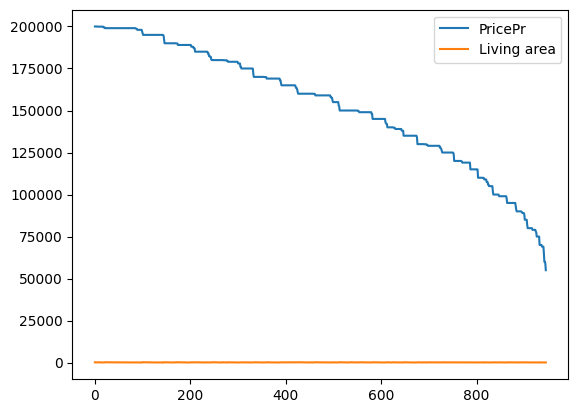

In [128]:
import matplotlib.pyplot as plt
lines = df5.plot.line()
#line = lines.axhline(y =.5, xmin=.25, xmax=.75)
x = ['200K', '250K', '300K', '350K', '400K', '450K', '500K', '550K', '650K', '700K']

PricePr 
Minimum:39999.00
Mean:429610.05
Median:319000.00
Mode:199000.00
Maximum:11000000.00

Living area 
Minimum:1.00
Mean:137.29
Median:112.00
Mode:120.00
Maximum:2418.00

Bedrooms 
Minimum:1.00
Mean:2.67
Median:2.00
Mode:2.00
Maximum:16.00



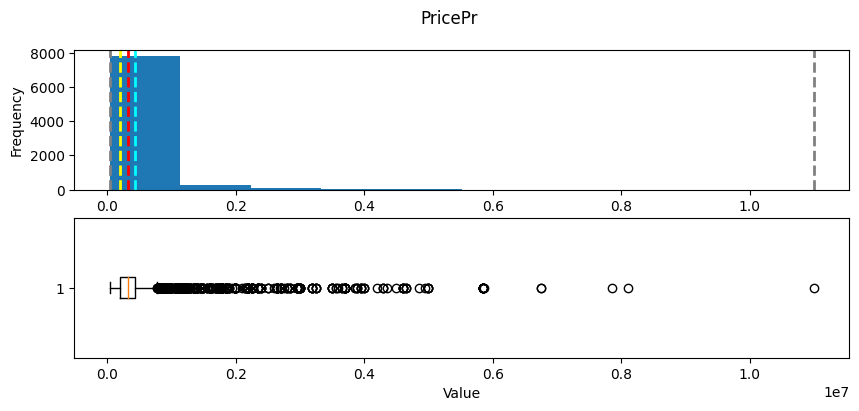

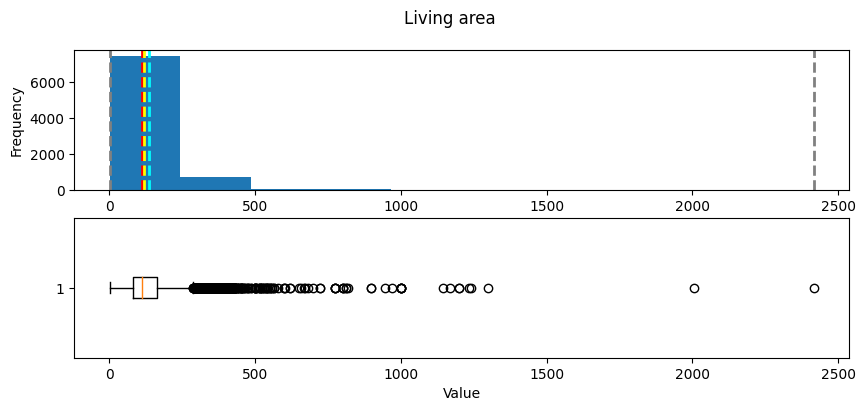

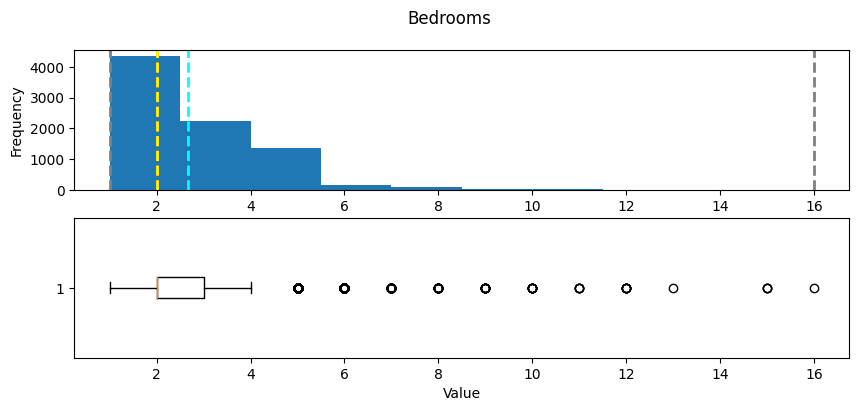

In [129]:
%matplotlib inline
from matplotlib import pyplot as plt
def show_distribution(var_data):
    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]
    print(var_data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val, mean_val,med_val, mod_val,max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    fig.suptitle(var_data.name)
    fig

# Call the function for each delay field
fields = ["PricePr", "Living area",  "Bedrooms"]
for col in fields:
    show_distribution(us[col])

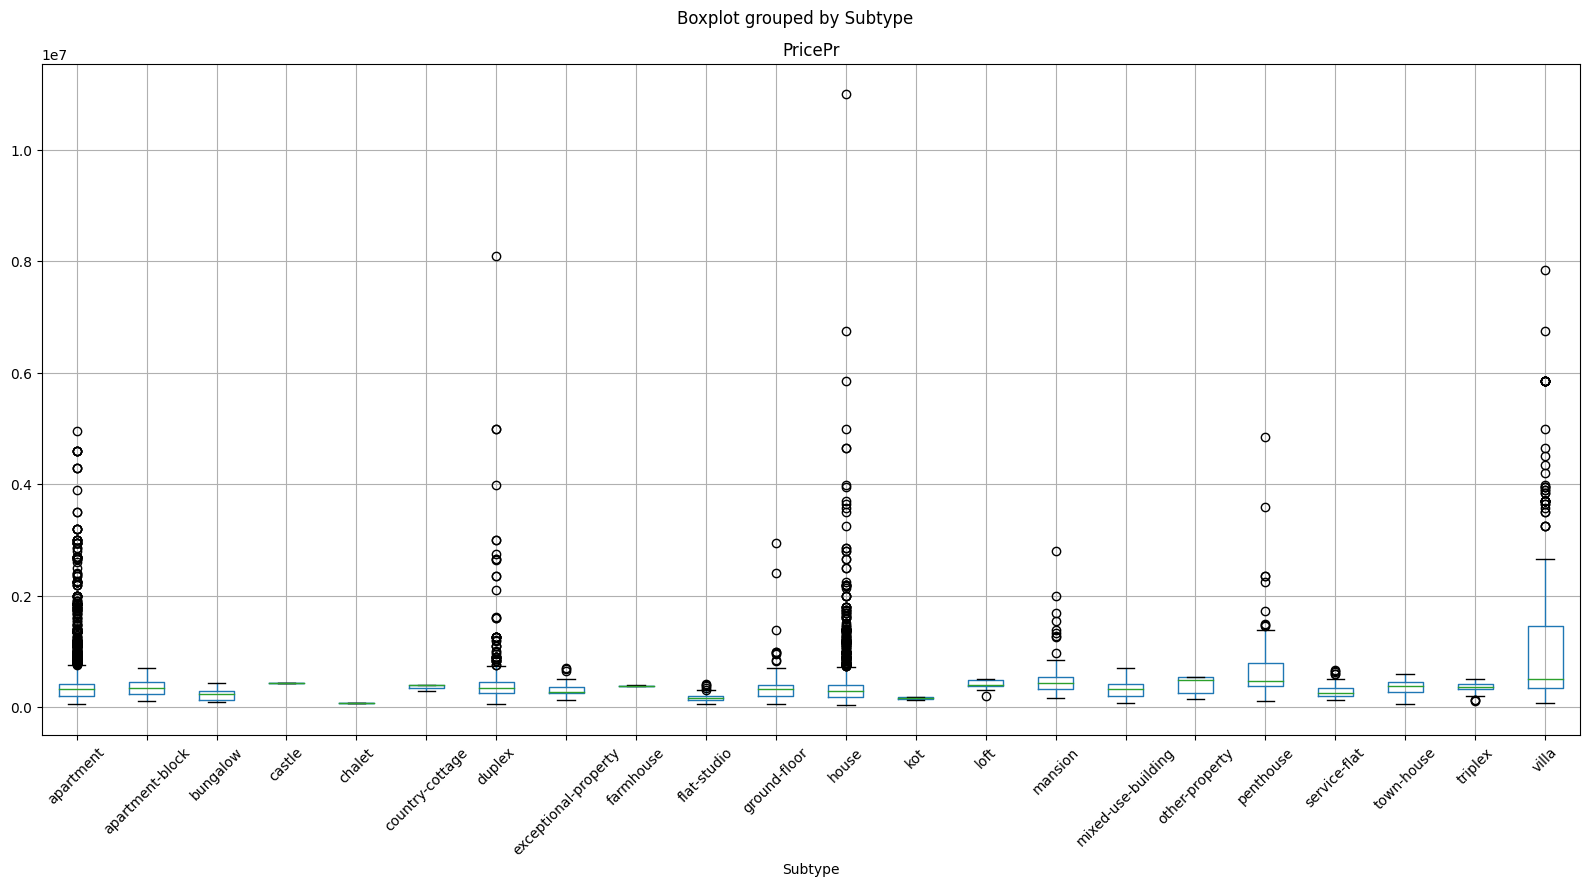

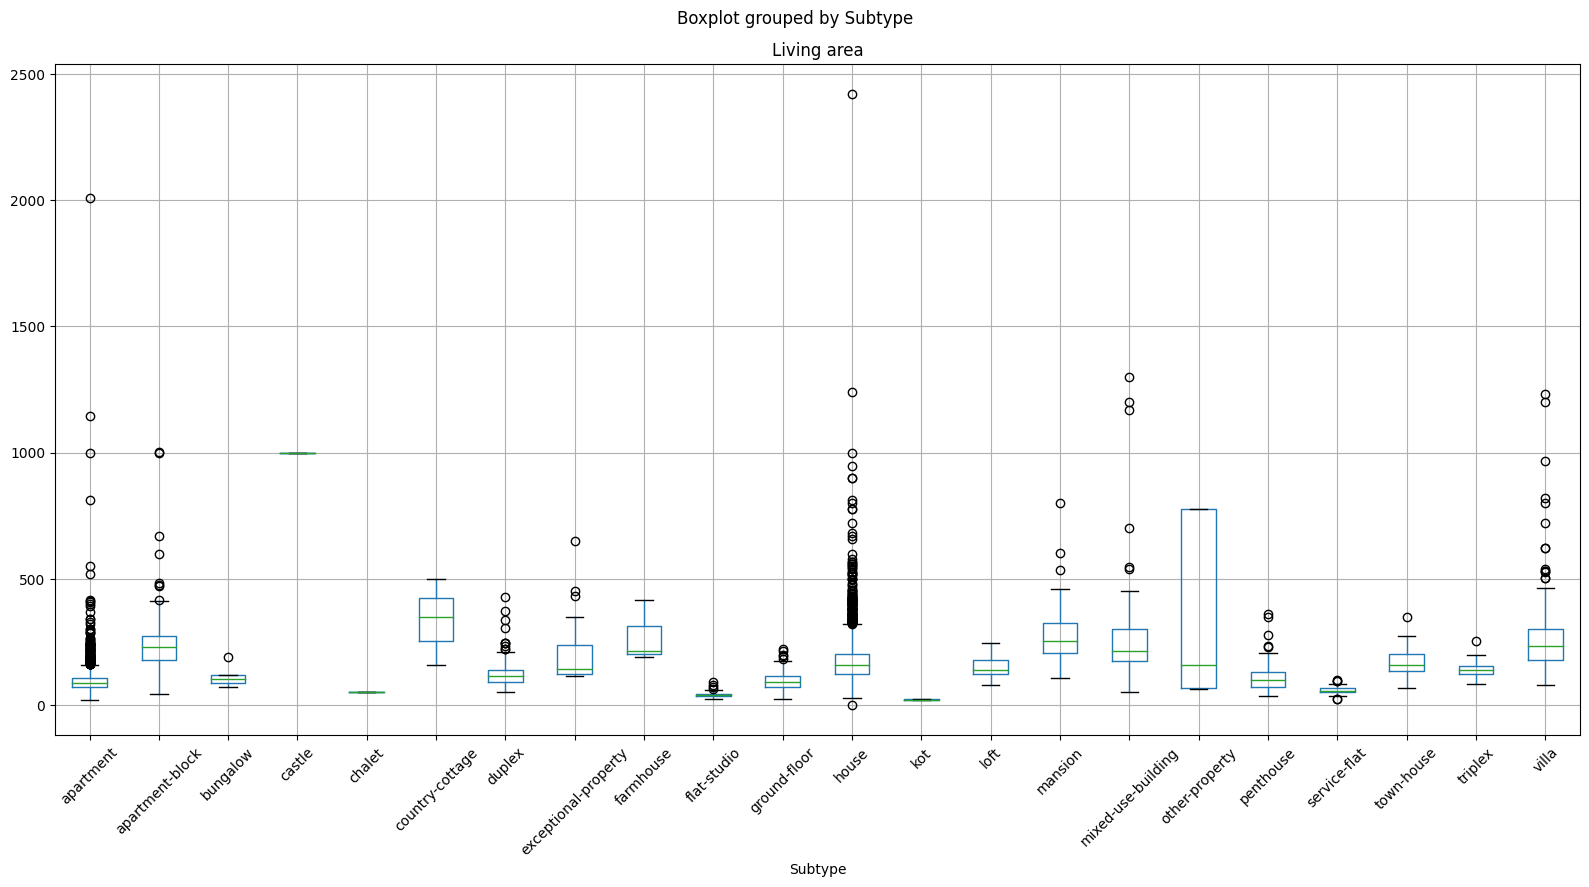

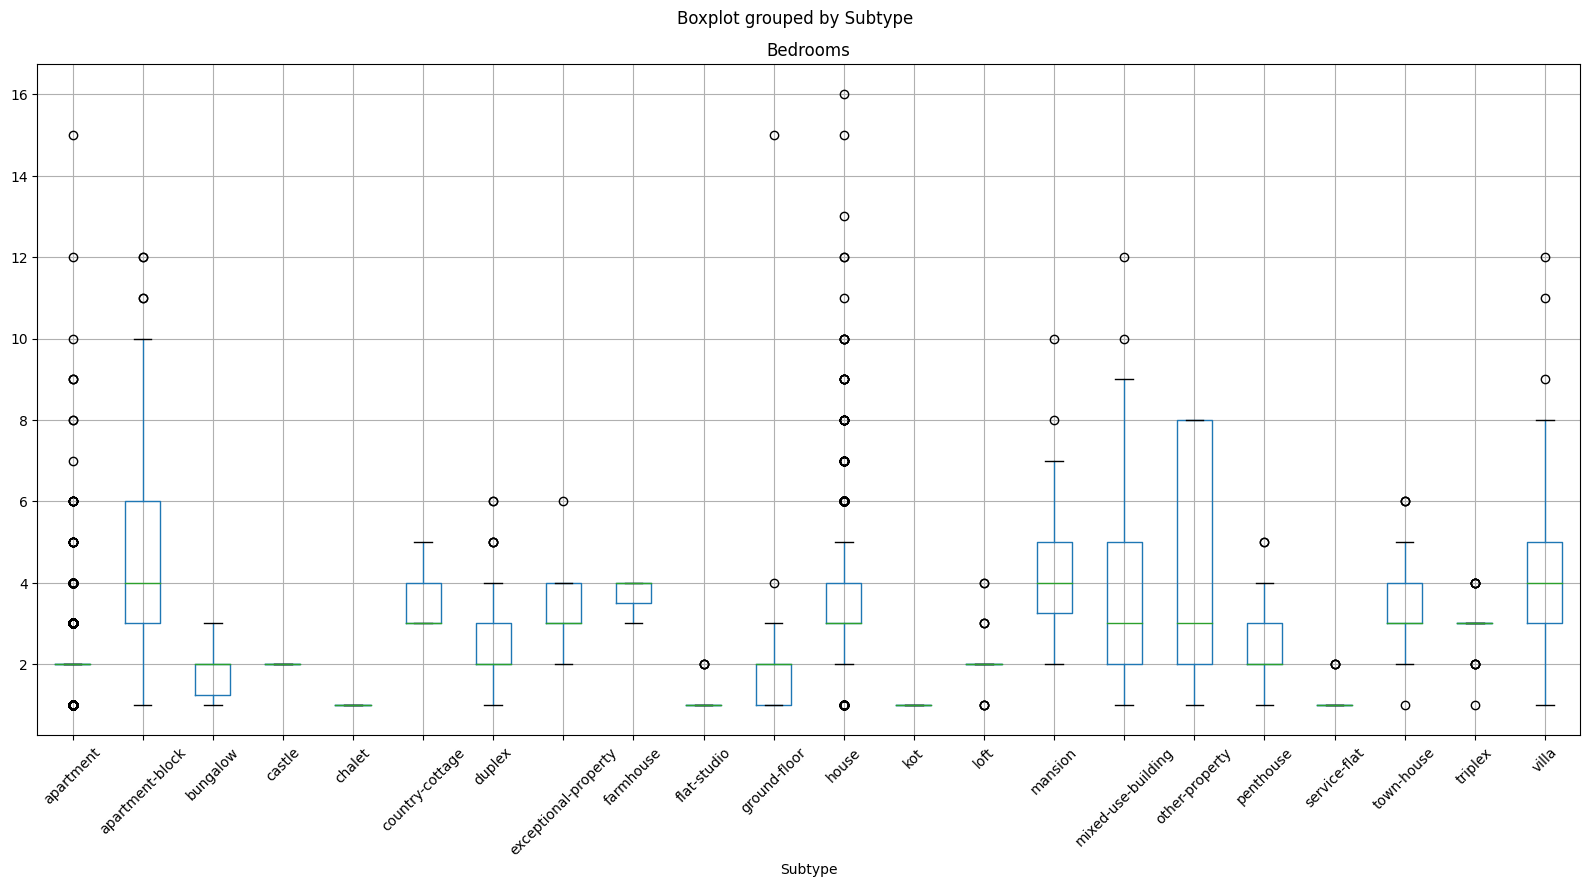

In [130]:

# boxplot to see outliers in Subtypes
for col in fields:
    us.boxplot(column=col, by='Subtype', figsize=(16,8))
    plt.tight_layout()
    plt.tick_params(axis='x', labelrotation=45)



,Bedrooms
Locality,
Montigny Sur Sambre,6.000000
Charleroi (Marcinelle),6.000000
Gerpinnes Loverval,6.000000
Charleroi Dampremy,5.750000
Brussel 13,5.000000
Houdeng Goegnies,5.000000
Les Bons Villers (Frasnes Lez Gosselies),5.000000
Hertsberge,4.500000
Damme,4.500000


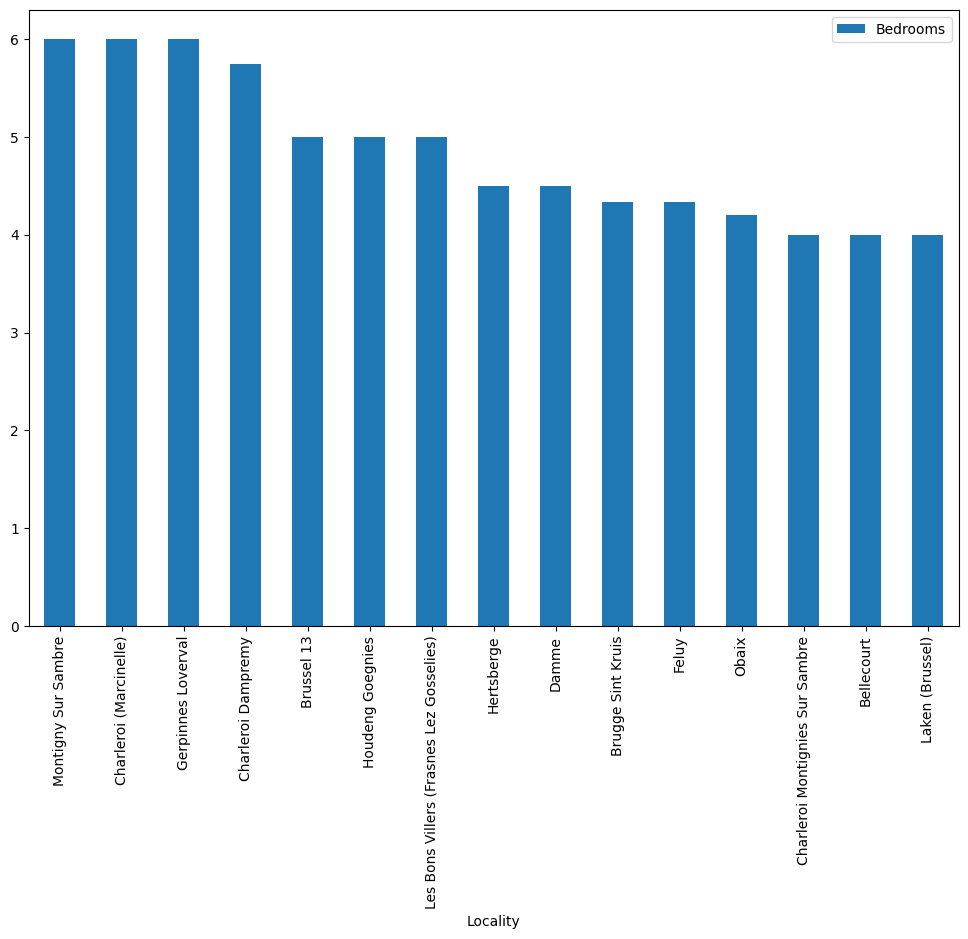

In [131]:
# show locality with most bedrooms
loc_group = us.groupby(us['Locality'])
mean_bedrooms = pd.DataFrame(loc_group['Bedrooms'].mean()).sort_values('Bedrooms', ascending=False).head(15)
mean_bedrooms.plot(kind = "bar", figsize=(12,8))
mean_bedrooms


,PricePr
Locality,
Zoute,5.000000e+06
Het Zoute,2.465000e+06
Brugge Zeebrugge,2.400000e+06
Knokke Zoute,2.232904e+06
Knokke Heist Knokke,2.086762e+06
Knokke Heist,1.407493e+06
Duinbergen,1.305357e+06
Knokke,1.056359e+06
Knokke Centrum,9.515000e+05


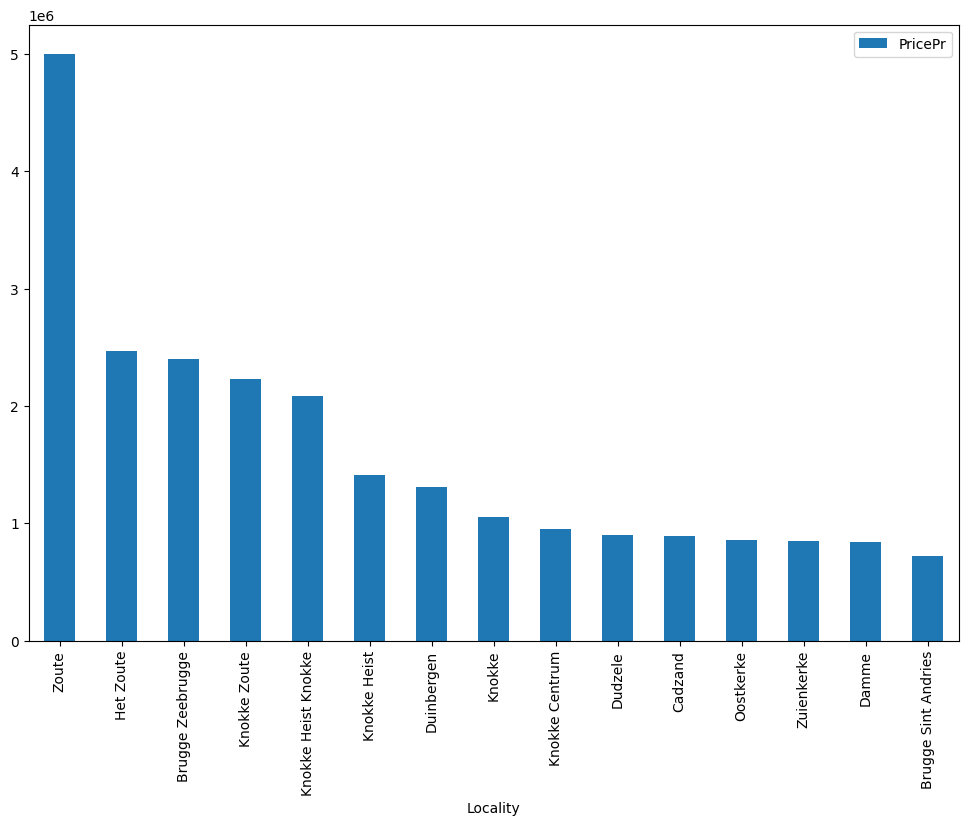

In [132]:
# show most expensive locality
loc_group = us.groupby(us['Locality'])
mean_price = pd.DataFrame(loc_group['PricePr'].mean()).sort_values('PricePr', ascending=False).head(15)
mean_price.plot(kind = "bar", figsize=(12,8))
mean_price

,PricePr
Locality,
Zoute,5000000.0
Brugge Zeebrugge,2400000.0
Het Zoute,2350000.0
Knokke Heist Knokke,1697500.0
Knokke Zoute,1250000.0
Duinbergen,995000.0
Knokke Heist,940000.0
Knokke Centrum,899000.0
Cadzand,890000.0


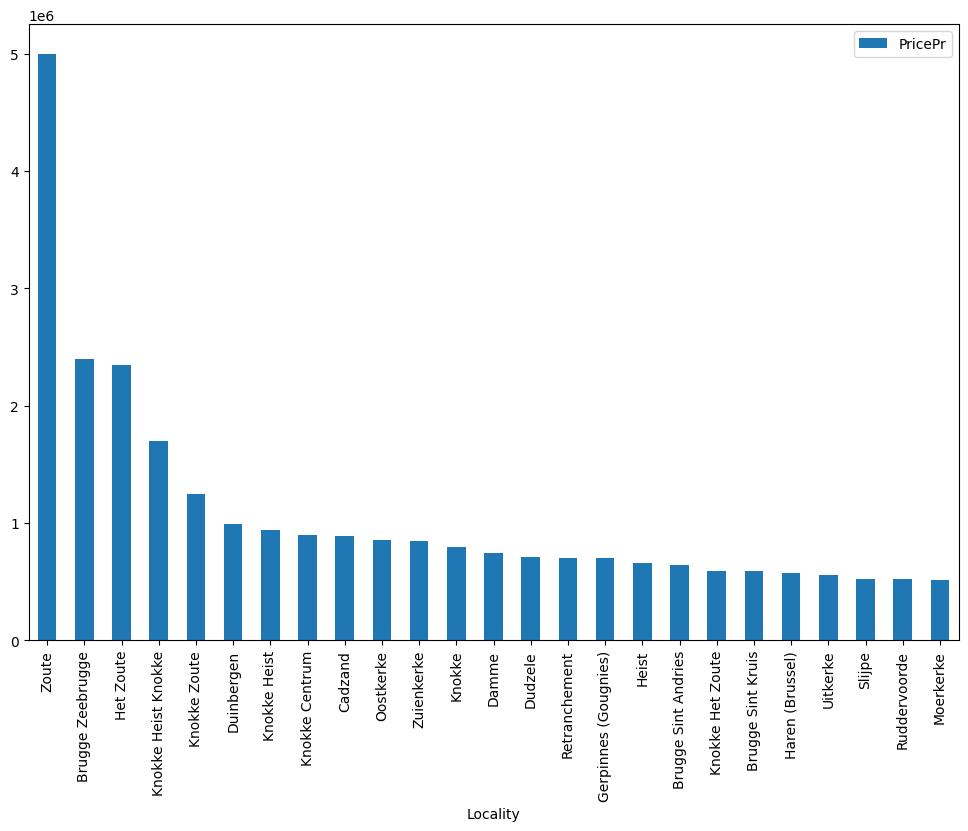

In [133]:
# show most expensive locality show median
loc_group = us.groupby(us['Locality'])
mean_bedrooms = pd.DataFrame(loc_group['PricePr'].median()).sort_values('PricePr', ascending=False).head(25)
mean_bedrooms.plot(kind = "bar", figsize=(12,8))
mean_bedrooms

less expensive locality Locality
Belgium                     125000.0
Ostend                      120000.0
Gouyt Lez Pieton            115000.0
Gilly Limite Lodelinsart    104900.0
Presles                      99000.0
Name: PricePr, dtype: float64
less expensive locality count         5.000000
mean     112780.000000
std       10704.765294
min       99000.000000
25%      104900.000000
50%      115000.000000
75%      120000.000000
max      125000.000000
Name: PricePr, dtype: float64
cheapest m/sq locality count    5.000000
mean     0.000833
std      0.000363
min      0.000392
25%      0.000625
50%      0.000763
75%      0.001081
max      0.001304
Name: price_sqr, dtype: float64


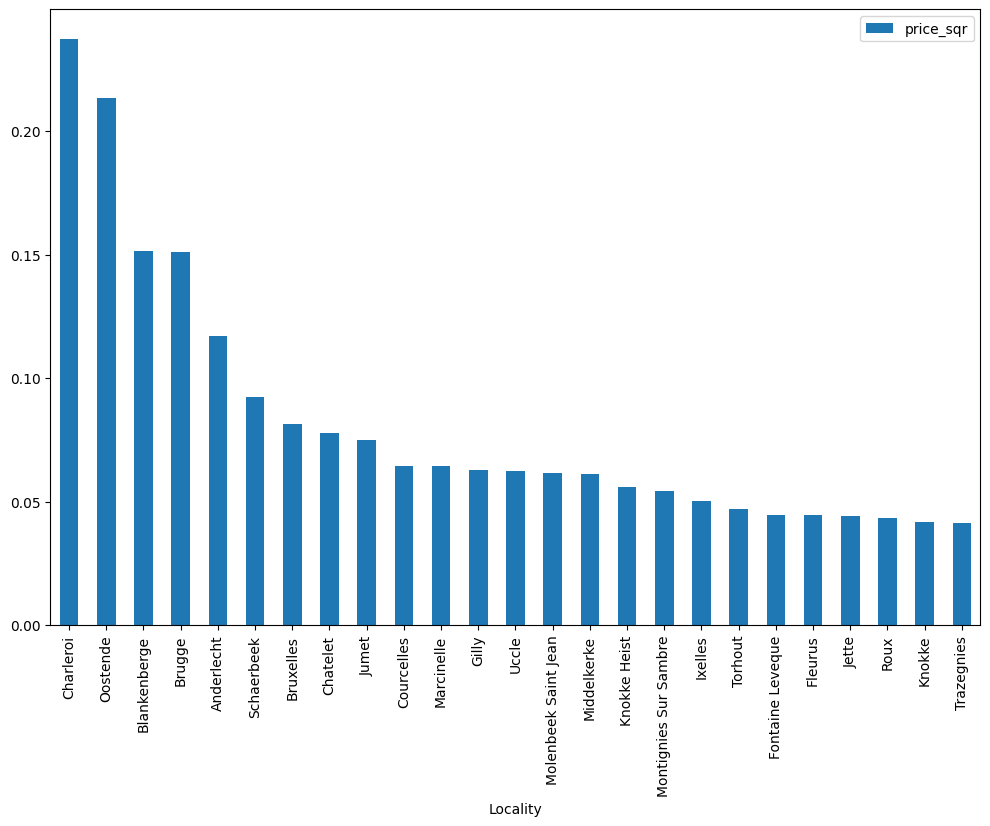

In [134]:

us1= us.dropna(subset='Living area')
us1['price_sqr'] = us1['Living area']/us1['PricePr']

# show most expensive locality - price per meter living area
loc_group = us1.groupby(us1['Locality'])
price_sqr = pd.DataFrame(loc_group['price_sqr'].sum()).sort_values('price_sqr', ascending=False).head(25)
price_sqr.plot(kind = "bar", figsize=(12,8))
price_sqr
# Group
group = us1.groupby(us1['Locality'])
less = group.mean(numeric_only=True).sort_values('PricePr', ascending=False)
show_summary= less['PricePr']
print('less expensive locality' , show_summary.tail(5))
print('less expensive locality' , show_summary.tail(5).describe())
print('cheapest m/sq locality' , less['price_sqr'].tail(5).describe())


show less expensive localities on the coast, in Brussel - Charleroi

In [135]:

# Group
group = us.groupby(us['Locality'])
less = group.mean(numeric_only=True).sort_values('PricePr', ascending=False)
show_summary= less['PricePr']
print('less expensive locality' , show_summary.tail(5))
print('less expensive locality' , show_summary.tail(5).describe())

less expensive locality Locality
Belgium                     125000.0
Ostend                      120000.0
Gouyt Lez Pieton            115000.0
Gilly Limite Lodelinsart    104900.0
Presles                      99000.0
Name: PricePr, dtype: float64
less expensive locality count         5.000000
mean     112780.000000
std       10704.765294
min       99000.000000
25%      104900.000000
50%      115000.000000
75%      120000.000000
max      125000.000000
Name: PricePr, dtype: float64
